# Основы Python
*Ruslan V. Akhpashev - 2021, e-mail: ruslan.akhpashev@gmail.com, github.com: https://github.com/fzybot/softDev*
## Консультация по лабораторным работам Сети ЭВМ.

### Спектр сигнала. Преобразование Фурье

Text(0.5, 0, 'time / milliseconds')

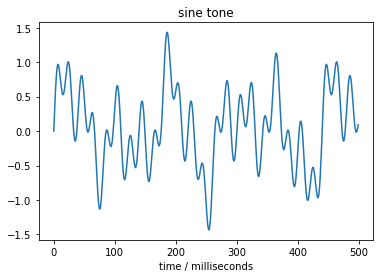

In [37]:
import numpy as np
import matplotlib.pyplot as plt

duration = 4  # длительность сигнала в секундах
amplitude = 0.4  # амплитуда  (в пределах: +-1.0)

fs = 44000 # частота дискретизации

timeSamples = np.arange(np.ceil(duration * fs)) / fs

signal2 = amplitude * np.sin(2 * np.pi * 2200 * timeSamples)
signal3 = amplitude * np.sin(2 * np.pi * 300 * timeSamples)
signal4 = amplitude * np.sin(2 * np.pi * 1000 * timeSamples)
signal5 = amplitude * np.sin(2 * np.pi * 500 * timeSamples)

signalSumm = signal2 + signal3 + signal4 + signal5

plt.plot(signalSumm[:500])
plt.title("sine tone")
plt.xlabel("time / milliseconds")

### Прямое преобразование Фурье. Спектр сигнала.

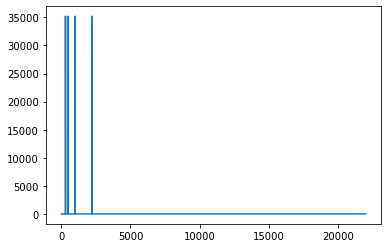

In [40]:
N = duration * fs

spector = np.fft.rfft(signalSumm)
x_axis = np.fft.rfftfreq(N, 1/fs)

plt.plot(x_axis, np.abs(spector))
plt.show()

### Обратное преобразование Фурье. Восстановление сигнала.

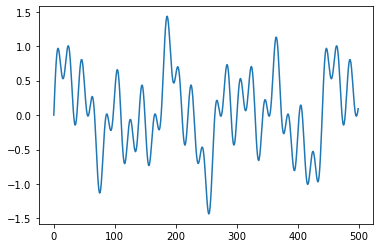

In [42]:
new_sig = np.fft.irfft(spector)
plt.plot(new_sig[:500])
plt.show()

### Модуляция QPSK (TS 38.211)

In [54]:
import random
import math

def randomDataGenerator(size):
    data = [random.randint(0, 1) for i in range(size)]
    
    # Альтернативный вариант добавления значений в массив
#     for i in range(size):
#         data.append(random.randint(0, 1))
    return data

def QPSK(data_array):
    if (len(data_array) % 2 != 0):
        print("Error, check data_array length")
        return 0
    else:
        di = [] # массив комплексных чисел
        print("Start modulation")
        for i in range(0, len(data_array), 2):
            b2i = data_array[i]
            b2i1 = data_array[i+1]
            real = (1 - 2 * b2i) / math.sqrt(2)
            imag = (1 - 2 * b2i1) / math.sqrt(2)
            di.append(complex(real, imag))
        return di


In [55]:
array = randomDataGenerator(10)
print("1. Generated array = ", array)
modulated = QPSK(array)
print("2. Modulated array = ",modulated)

1. Generated array =  [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Start modulation
2. Modulated array =  [(-0.7071067811865475+0.7071067811865475j), (-0.7071067811865475+0.7071067811865475j), (-0.7071067811865475+0.7071067811865475j), (-0.7071067811865475+0.7071067811865475j), (-0.7071067811865475-0.7071067811865475j)]
